> # 클러스터링을 위한 지역적 변수의 위치값 추출

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline
#%matplotlib notebook
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시

import folium
print("folium version is", folium.__version__)


# 한글 깨짐 방지 목적 #
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

# 경고 메시지 생략
import warnings
warnings.filterwarnings(action='ignore')

folium version is 0.10.0


## Import dataset

In [2]:
df_acci = pd.read_csv('Rawdata/교통사고/도로교통공단_교통사고다발지역_20190725.csv', encoding='cp949')
df_cctv = pd.read_csv('Rawdata/CCTV/전국cctv표준데이터.csv', encoding='cp949')
df_subway = pd.read_csv('Rawdata/지하철/서울시 역코드로 지하철역 위치 조회.csv', encoding='utf8')

## 01 : 교통사고다발지역 데이터

## 사고 발생 건수가 5건 이상인 위치 필터링

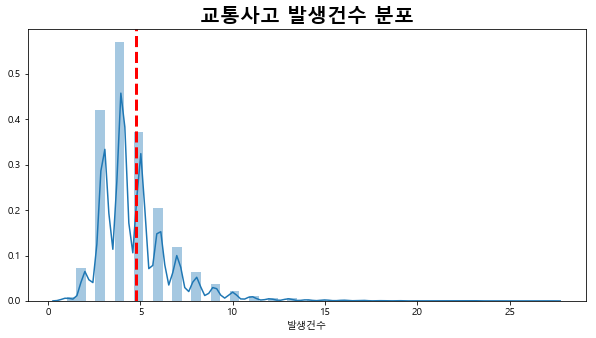

교통사고 발생건수의 평균 : 4.7465753424657535


In [3]:
plt.figure(figsize=(10,5))
plt.title('교통사고 발생건수 분포', weight='bold', size=20)
sns.distplot(df_acci['발생건수'])
plt.axvline(x=df_acci['발생건수'].mean(), color='r', linestyle='--', linewidth=3)
plt.show()
print('교통사고 발생건수의 평균 :',df_acci['발생건수'].mean())

In [4]:
print('교통사고 발생건수가 5 이상인 위치 갯수 :', len(df_acci[df_acci['발생건수']>=5]))

교통사고 발생건수가 5 이상인 위치 갯수 : 4522


In [5]:
df_acci_high = df_acci[df_acci['발생건수']>=5]
df_acci_high.index = range(len(df_acci_high))
df_acci_high.head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013097,2012,보행어린이,11215002,서울특별시 광진구2,서울특별시 광진구 광장동(광장사거리 부근),5,5,0,1,3,1,37.544331,127.103648,"{type:Polygon,coordinates:[[[127.1052479,37.54...",2019-07-25
1,2013097,2012,보행어린이,11500001,서울특별시 강서구1,서울특별시 강서구 화곡동(신정초교앞사거리 부근),5,5,0,1,4,0,37.531613,126.854639,"{type:Polygon,coordinates:[[[126.8562391,37.53...",2019-07-25
2,2013097,2012,보행어린이,27260004,대구광역시 수성구4,대구광역시 수성구 지산동(범어네거리서편 부근),5,6,1,1,4,0,35.823834,128.634791,"{type:Polygon,coordinates:[[[128.6363557,35.82...",2019-07-25
3,2013097,2012,보행어린이,29200002,광주광역시 광산구2,광주광역시 광산구 신창동(신창3차호반베르디움 부근),5,6,0,0,6,0,35.198630,126.840149,"{type:Polygon,coordinates:[[[126.8417021,35.19...",2019-07-25
4,2013097,2012,보행어린이,30170002,대전광역시 서구2,대전광역시 서구 둔산동(김가네분식 부근),5,5,0,4,1,0,36.351916,127.389666,"{type:Polygon,coordinates:[[[127.3912412,36.35...",2019-07-25


In [6]:
len(df_acci_high)

4522

## 중복 제거

In [7]:
df=df_acci_high[['위도', '경도']].drop_duplicates()
df.duplicated().sum()

0

## 지도 교통사고다발지역 시각화

In [8]:
loclist = [list(i) for i in zip(df['위도'], df['경도'])]

m = folium.Map(location = [37.581306, 126.972694], zoom_start=10)
for j in loclist:
    folium.Marker(j).add_to(m)
m

## 교통사고다발지역 위치 추출

In [9]:
# df.index = range(len(df))
# df.to_csv('Data/교통사고다발지역 경도위도.csv', index=False, encoding='cp949')

## 02 : CCTV 데이터

In [10]:
df_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,Unnamed: 15
0,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(3),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
1,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(2),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
2,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 사무실 복도(1),30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
3,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,지하1층 세미나실 내부,30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN
4,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,경상북도 청도군 화양읍 삼신리 693-2,다목적,1,41.0,1층 종합안내실 내부,30.0,2011-09,054-370-8083,35.687293,128.724165,2018-02-14,B551450,청도공영사업공사,NaN


In [11]:
df_cctv['시도'] = df_cctv['소재지도로명주소'].astype('str').apply(lambda x : x.split( )[0])
df2 = df_cctv[df_cctv['시도']=='서울특별시'][['위도','경도']].drop_duplicates()

In [12]:
len(df2)

21345

## CCTV 위치 추출

In [13]:
# df2.index = range(len(df2))
# df2.to_csv('Data/CCTV 경도위도.csv', index=False, encoding='cp949')

## 02 : 지하철역 데이터

In [14]:
df_subway.head()

,전철역코드,전철역명,호선,외부코드,사이버스테이션,X좌표,Y좌표,X좌표(WGS),Y좌표(WGS)
0,2818,가락시장,8,817,2818,525992.0,1108579.0,37.492522,127.118234
1,340,가락시장,3,350,2818,525992.0,1108579.0,37.492522,127.118234
2,2535,종로3가,5,534,153,498060.0,1130332.0,37.571607,126.991806
3,319,종로3가,3,329,153,498060.0,1130332.0,37.571607,126.991806
4,153,종로3가,1,130,153,498060.0,1130332.0,37.571607,126.991806


In [15]:
df_subway = df_subway[['X좌표(WGS)', 'Y좌표(WGS)']]
df_subway.columns = ['위도', '경도']

## 중복 제거

In [16]:
df3 = df_subway[['위도', '경도']].drop_duplicates()

In [17]:
df_subway.isnull().sum()

위도    14
경도    14
dtype: int64

In [18]:
df3 = df3.dropna()

In [19]:
len(df3)

576

In [20]:
loclist = [list(i) for i in zip(df3['위도'], df3['경도'])]

m = folium.Map(location = [37.581306, 126.972694], zoom_start=10)
for j in loclist:
    folium.Marker(j).add_to(m)
m

## 지하철역 위치 추출

In [21]:
# df3.index = range(len(df3))
# df3.to_csv('Data/지하철 경도위도.csv', index=False, encoding='cp949')